In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [2, 2] # inches
mpl.rcParams['font.size'] = 8

# Define a function to do the most common plotting task
def xyplot(x1=None, y1=None, x2=None, y2=None, x3=None, y3=None, title=None, fname=None):
    plt.figure()
    if x1 is not None and y1 is not None:
        plt.plot(x1,y1,'b.')
    if x2 is not None and y2 is not None:
        plt.plot(x2,y2,'k-')
    if x3 is not None and y3 is not None:
        plt.plot(x3,y3,'r-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.tight_layout()
    if fname:
        plt.savefig(fname)

An alternative way to prevent overfitting is to employ a regularisation method. Here, we use $L_2$ regularisation, which employs the loss function

$$\mathcal{L}(\mathbf{w}) = \left(\mathbf{y}-\mathbf{\Phi}\mathbf{w}\right)^\mathrm{T}\left(\mathbf{y}-\mathbf{\Phi}\mathbf{w}\right) + \lambda\mathbf{w}^\mathrm{T}\mathbf{w}$$

which is minimised by solving
$$\left(\mathbf{\Phi}^\mathrm{T}\mathbf{\Phi}-\lambda\mathbf{I}\right)\mathbf{w} = \mathbf{\Phi}^\mathrm{T}\mathbf{y}$$

We will see here that whilst too little regularisation leads to overfitting, too much leads to a loss of expressive power in the model


 1.06 &  8.31 & -17.92 & -76.20 & 76.16 & 250.58 & -112.92 & -350.94 & 53.88 & 168.61
 1.67 &  5.77 & -41.44 & -29.12 & 212.84 & 31.81 & -356.24 &  1.30 & 183.44 & -9.40
 0.74 &  6.51 & -5.21 & -33.75 &  1.46 & 33.96 & 20.81 & 13.89 & -17.55 & -20.25
 0.94 &  1.29 & -9.30 &  5.42 & 15.29 & -21.02 &  5.50 & -4.36 & -12.20 & 19.08
 0.20 &  4.26 &  2.26 & -10.00 & -5.63 & -4.88 & -0.83 &  2.60 &  4.33 &  8.47
 0.56 & -2.12 & -1.35 &  4.00 & -0.63 &  1.44 &  0.50 & -0.84 &  1.30 & -2.35


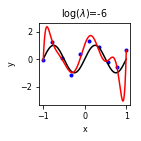

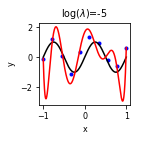

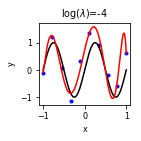

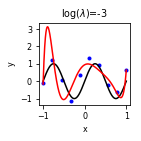

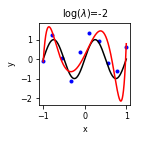

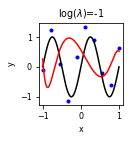

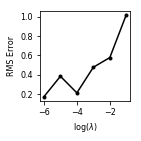

In [6]:
# Generate data with random noise
np.random.seed(12345)
f = lambda x: np.sin(2*np.pi*x)
x = np.linspace(-1,1,10)
t = f(x)
y = t + 0.5*np.random.randn(x.size)
# Hi-res sampling for plotting purposes
x0 = np.linspace(-1,1,1000)
y0 = f(x0) # underlying function
# Empty lists to store results
rsq = []
weights = []
# Create a basis matrix for a high-order fit so we can assess overfitting.
Phi = np.array([pow(x,i) for i in range(0,10)]).transpose()
# Basis for high-order, high res fit so we can plot the fit.
hiPhi = np.array([pow(x0,i) for i in range(0,10)]).transpose()
# Define the values of the regularisation parameter 
loglambda = [-6, -5, -4, -3, -2, -1]
for l in loglambda:
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi)-pow(10,l)*np.eye(y.size), np.matmul(Phi.transpose(),y))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(y-yp,2)/x.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    xyplot(x, y, x2=x0, y2=y0, x3=x0, y3=np.matmul(hiPhi,w), title=r'$\log(\lambda)$='+str(l), fname='../figures/regression/sin-noisy-L2-L'+str(l)+'.pdf')
# Plot the error curve
plt.figure()
plt.plot(loglambda,rsq,'k.-')
plt.xlabel(r'$\log(\lambda)$')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('../figures/regression/sin-noisy-L2-rms.pdf')
for w in weights:
    print(' & '.join(['{:5.2f}'.format(i) for i in w]))

Now let's try something different - the *lasso* method that uses $L_1$ regularisation.

C:\Users\ibs\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


 0.00 &  3.96 & -7.22 & -15.46 & 14.87 &  9.87 & -4.68 &  2.63 & -3.49 & -0.64
 0.00 &  3.92 & -7.01 & -15.10 & 14.12 &  9.24 & -3.78 &  2.72 & -3.83 & -0.41
 0.00 &  3.45 & -4.89 & -11.90 &  8.50 &  3.92 & -0.00 &  4.51 & -3.98 &  0.39
 0.00 &  1.42 & -0.04 & -4.46 &  0.00 & -0.00 &  0.00 &  0.00 &  0.00 &  3.33
 0.00 & -0.00 & -0.00 & -0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00
[0.8067923868225436, 0.7983966697208185, 0.7012709500539601, 0.5782740201982384, 0.797266239390005]


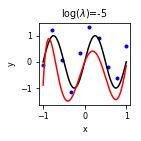

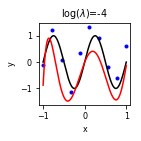

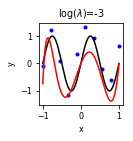

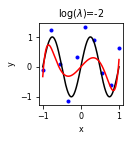

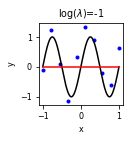

In [13]:
from sklearn import linear_model
# Empty lists to store results
rsq = []
weights = []
# Create a basis matrix for a high-order fit so we can assess overfitting.
Phi = np.array([pow(x,i) for i in range(0,10)]).transpose()
# Basis for high-order, high res fit so we can plot the fit.
hiPhi = np.array([pow(x0,i) for i in range(0,10)]).transpose()
# Define the values of the regularisation parameter 
loglambda = [-5, -4, -3, -2, -1]
for l in loglambda:
    clf = linear_model.Lasso(alpha=pow(10,l))
    clf.fit(Phi,y)
    w = clf.coef_
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(y-yp,2)/x.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    xyplot(x, y, x2=x0, y2=y0, x3=x0, y3=np.matmul(hiPhi,w), title=r'$\log(\lambda)$='+str(l), fname='../figures/regression/sin-noisy-L1-L'+str(l)+'.pdf')
for w in weights:
    print(' & '.join(['{:5.2f}'.format(i) for i in w]))
print(rsq)